# Milestone 2: Populations simulation

In [3]:
import random                  
import math
import numpy as np
from matplotlib import pyplot as plt

# What I tried

- Modelling populations as a vector and the predation rules as a matrix, applying matrix multiplication I would then get the population after one cycle, however this is too simplistic, as population growth does not depend only on the population of the other species, but also its own
- Next I tried generalizing the [Lotka-Volterra](https://services.math.duke.edu/education/webfeats/Word2HTML/Predator.html) model for prey-predator dynamics, however this didn't work out as I thought, since it resulted only in infrequent spikes of populations, which wouldn't be interesting for the piece
- Then I tried removing the reproduction rates (so the only cause of population growth is predation), and I started getting results which looked more interesting
- Finally I figured out keeping slight reproduction rates was useful for balancing and finding a good equilibrium
- Below follows a version where I also try to model how the sound masses would move - however when I tried to implement some type of accelleration towards/away from prey/predator, the positions of the individual species just diverged. Even when I tried to implement some sort of attraction to 0, to keep things in bounds, things were not very tame, so for the purpose of keeping some remotely musical structure, I had to simplify the model so it doesn't really simulate how the species would move in space, but rather it reacts to changes in populations and tries to get closer/farther away from the initial (mean) positions of the given prey/predator. The advantage of this is that we get a periodic pattern which reflects the changes in intensity that occur.

## Setup
Here we define the values that will govern how the system behaves

In [21]:
# The populations vector represents the size of the population for each species
populations = np.array([20.0, 100.0, 300.0, 100.0])
# The positions vector attempts to model how species would try to get closer/farther to/from their prey/predator
positions = np.linspace(-1, 1, 4)

# The predation table determines which species predates on which species and with which intensity
# It is antisymmetric, since if A predates B, then B is the prey of A
predation_table = np.zeros([4, 4])
# The values are filled for predators
predation_table[0, 1] = 0.0015
predation_table[1, 2] = 0.003
predation_table[0, 2] = 0.0005
predation_table[2, 3] = 0.002
predation_table[3, 0] = 0.001
predation_table[3, 1] = 0.001
# Here the table is made antisymmetric
predation_table -= predation_table.T

print(predation_table)

# The reproduction rate represents the baseline relative change in the species population
reproduction_rates = np.array([-0.02, 0.03, 0, 0])

[[ 0.      0.0015  0.0005 -0.001 ]
 [-0.0015  0.      0.003  -0.001 ]
 [-0.0005 -0.003   0.      0.002 ]
 [ 0.001   0.001  -0.002   0.    ]]


## Update function
Here we define the rules which the system follows and with which it evolves

In [19]:
# update simulates a step of time and returns the new populations and positions
def update(populations, positions, predation_table, reproduction_rates, dt=0.02):
    new_populations = populations
    new_positions = np.zeros(positions.shape)
    for i in range(0, populations.shape[0]):
        # The growth factor is basically the derivative of the population based on the Lotka-Volterra equations
        growth_factor = populations[i]*(reproduction_rates[i] + np.sum(populations*predation_table[i, :]))
        new_populations[i] += growth_factor*dt
        
        # The displacement determines essentially how species would want to move if they wanted to get closer to their prey
        # and farther from their predator
        displacement = 0
        for j in range(0, populations.shape[0]):
            if j != i:
                displacement += populations[j]*(1./(positions[i] - positions[j]))*predation_table[i, j]*0.3
        new_positions[i] = positions[i] + displacement
    return (new_populations, new_positions)

## Simulation
Here we perform the simulation and show the results

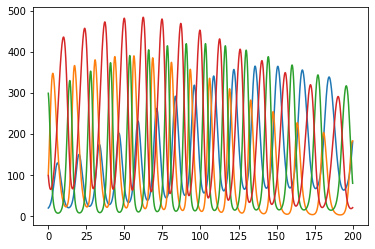

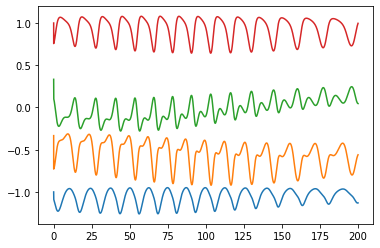

In [23]:
# Number of steps in the simulation
n_iter = 10000;
# Time step used
dt = 0.02;
# Arrays which keep track of the populations and positions over time
population_evolution = np.array([populations]);
positions_evolution = np.array([positions])
# Perform the simulation n_iter times
for i in range(1, n_iter):
    last_populations = population_evolution[-1, :]
    last_positions = positions_evolution[-1, :]
    (new_populations, new_positions) = update(last_populations, positions, predation_table, reproduction_rates, dt)
    population_evolution = np.append(population_evolution, [new_populations], axis=0)
    positions_evolution = np.append(positions_evolution, [new_positions], axis=0)

# Time intervals used for graphing
xs = [dt*x for x in range(0, n_iter)]
# Graph the populations against time
plt.plot(xs, population_evolution)
plt.show()
# Graph the positions against time
plt.plot(xs, positions_evolution)
plt.show()
